# **Ejercicio de modelos predictivos**

### Regresión lineal

Relación entre IMC  y grosor del pliegue de la piel (skinfold)

## Importar librerías y módulos

In [3]:
from pydataset import data #para importar el dataset
import pandas as pd #para manejar los dataset
import numpy as np #para realizar cálculos, matrices, etc
from sklearn.linear_model import LinearRegression #libreria para realizar modelos, en este caso regresion lineal
from sklearn.model_selection import train_test_split #Modulo de sklearn para dividir los datos de prueba y entrenamiento
from matplotlib import pyplot as plt #herramienta para graficar datos

ModuleNotFoundError: No module named 'pydataset'

In [ ]:
downloa

In [3]:
%matplotlib inline 
#para incluir las gráficas de matplotlib en este notebook

## Guardar el dataset en una variable

In [7]:
pima = data('Pima.tr') 
data()

,dataset_id,title
0,AirPassengers,Monthly Airline Passenger Numbers 1949-1960
1,BJsales,Sales Data with Leading Indicator
2,BOD,Biochemical Oxygen Demand
3,Formaldehyde,Determination of Formaldehyde
4,HairEyeColor,Hair and Eye Color of Statistics Students
...,...,...
752,VerbAgg,Verbal Aggression item responses
753,cake,Breakage Angle of Chocolate Cakes
754,cbpp,Contagious bovine pleuropneumonia
755,grouseticks,Data on red grouse ticks from Elston et al. 2001


## Mostrar las primeras líneas de nuestro dataset para conocer un poco los datos

Se estarán usando los datos de las columnas **bmi** y **skin**

In [6]:
pima.head()

,npreg,glu,bp,skin,bmi,ped,age,type
1,5,86,68,28,30.2,0.364,24,No
2,7,195,70,33,25.1,0.163,55,Yes
3,5,77,82,41,35.8,0.156,35,No
4,0,165,76,43,47.9,0.259,26,No
5,0,107,60,25,26.4,0.133,23,No


In [5]:
pima.count()

npreg    200
glu      200
bp       200
skin     200
bmi      200
ped      200
age      200
type     200
dtype: int64

## Gráfico de dispersión de los datos 

### Variable dependiente = bmi
### Variable independiente = skin

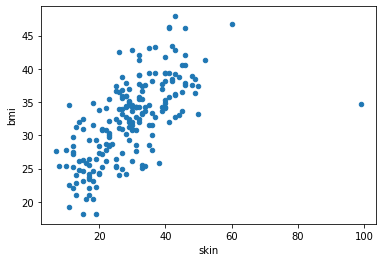

In [8]:
pima.plot(kind='scatter', x = 'skin', y='bmi')
plt.show()

## Dividir los datos en datos de entrenamiento y de prueba (aprendizaje supervizado)

### Entrenamiento 70%
### Prueba 30%

In [9]:
X_train, X_test, y_train, y_test = train_test_split(pima.skin, pima.bmi)

## Visualización de los datos divididos

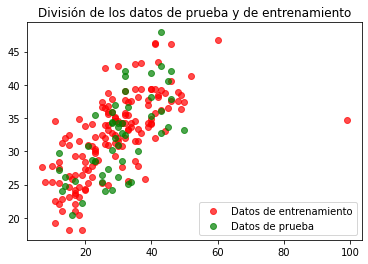

In [10]:
plt.scatter(X_train, y_train, label = 'Datos de entrenamiento', color='r', alpha=.7)
plt.scatter(X_test, y_test, label= 'Datos de prueba', color='g', alpha=.7)
plt.legend()
plt.title('División de los datos de prueba y de entrenamiento')
plt.show()


## Crear el modelo linear y entrenarlo

In [11]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values) #fit es para entrenar modelos

LinearRegression()

## Usar el modelo para predecir en datos de prueba

### Graficar la linea de predicción contra los datos de prueba actuales

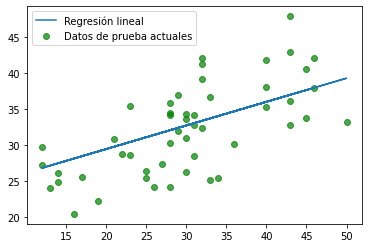

In [12]:
prediction = LR.predict(X_test.values.reshape(-1,1))

plt.plot(X_test, prediction, label = 'Regresión lineal')
plt.scatter(X_test, y_test, label='Datos de prueba actuales', color='g', alpha=.7)
plt.legend()
plt.show()

## Predecir el IMC (BMI) de mujeres con un pliegue cutáneo de 50

In [13]:
LR.predict(np.array([[40]]))[0]

35.99654420865511

## Predecir el IMC de mujeres con pliegue cutáneo de 100

In [18]:
LR.predict(np.array([[15]]))[0]

27.785108303275717

## Evaluar la precisión del modelo
### Mientras más se acerque a 1, mejor

In [16]:
LR.score(X_test.values.reshape(-1,1), y_test.values)

0.4157593790647234